# Gathering Data

In [ ]:
#installing tweepy
!pip install tweepy

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [2]:
# Import the Twitter archive CSV file into a DataFrame
df_archive = pd.read_csv('twitter-archive-enhanced.csv')


In [ ]:
# Download tweet image predictions TSV using the Requests library and write it to image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    


In [3]:
# Import the tweet image predictions TSV file into a DataFrame
img_df = pd.read_csv('image_predictions.tsv', sep='\t')

In [ ]:
#img_df

In [ ]:
#df_archive

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions


# Declare Twitter API keys and access tokens
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'



auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor


# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w', encoding='utf-8') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [43]:
# List of dictionaries to read tweet's JSON data line by line and later convert to a DataFrame
tweet_json_data = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        loaded_file = json.loads(line)
        
        # Append to list of dictionaries
        tweet_json_data.append({'tweet_id': loaded_file['id'],
                        'retweet_count': loaded_file['retweet_count'],
                        'favorite_count': loaded_file['favorite_count'],
                        'display_text_range': loaded_file['display_text_range'],
                        'full_text': loaded_file['full_text']
                        
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
tweet_json_df = pd.DataFrame(tweet_json_data, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range','full_text'])

# Assesing Data

#### Assesing the Quality data for:
    1. COmpleteness
    2. Validity
    3. Accuracy
    4. Consistency

In [45]:
#Visual assesment of random samples 
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2049,671504605491109889,NaN,NaN,2015-12-01 01:42:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He was just informed that dogs can't be Jedi. 11/10 https://t.co/mGW5c50mPA,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/671504605491109889/photo/1,https://twitter.com/dog_rates/status/671504605491109889/photo/1",11,10,Charlie,None,None,None,None
2340,666099513787052032,NaN,NaN,2015-11-16 03:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Can stand on stump for what seems like a while. Built that birdhouse? Impressive. Made friends with a squirrel. 8/10 https://t.co/Ri4nMTLq5C,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666099513787052032/photo/1,8,10,None,None,None,None,None
1989,672828477930868736,NaN,NaN,2015-12-04 17:23:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jerry. He's a Timbuk Slytherin. Eats his pizza from the side first. Crushed that cup with his bare paws 9/10 https://t.co/fvxHL6cRRs,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672828477930868736/photo/1,9,10,Jerry,None,None,None,None
1253,710833117892898816,NaN,NaN,2016-03-18 14:19:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Sora. She's an Egyptian Pumpernickel. Mesmerizing af. 12/10 would bring home to mom https://t.co/PmTR4kxZkq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710833117892898816/photo/1,12,10,Sora,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo


In [46]:
#Programmatic assesment using pandas .info() function to get summary infomartion on how dataset
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [47]:
#CXhecking for duplicate data rows across all columns
df_archive[df_archive.duplicated()].count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

In [48]:
#Checking again for null values(saw earlier wiht the .info())
df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [49]:
#Programmatic Assessment to check summary statistic 
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### Assessing for duplicates in some columns

In [50]:
df_archive.tweet_id.duplicated().sum()

0

In [51]:
df_archive.in_reply_to_status_id.duplicated().sum()

2278

In [52]:
df_archive.doggo.duplicated().sum()

2354

#### Checking the unique values for the different dog stages and their distribution

In [53]:

df_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [54]:

df_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [55]:
df_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [56]:
df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [57]:
# Checking for the distribution for the source of tweets
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [58]:
#Examining the text column of  index 2289
df_archive.text[2289]

"This is Clarence. His face says he doesn't want to be a donkey, but his tail is super pumped about it. 9/10 https://t.co/fGDWgukcBs"

In [59]:
#Assessing tne expandaed url column
df_archive.expanded_urls

0                                                                       https://twitter.com/dog_rates/status/892420643555336193/photo/1
1                                                                       https://twitter.com/dog_rates/status/892177421306343426/photo/1
2                                                                       https://twitter.com/dog_rates/status/891815181378084864/photo/1
3                                                                       https://twitter.com/dog_rates/status/891689557279858688/photo/1
4       https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1
                                                                     ...                                                               
2351                                                                    https://twitter.com/dog_rates/status/666049248165822465/photo/1
2352                                            

In [60]:
df_archive['in_reply_to_status_id'].value_counts("")

6.671522e+17    2
8.862664e+17    1
6.920419e+17    1
6.827884e+17    1
6.842229e+17    1
               ..
8.116272e+17    1
8.131273e+17    1
8.211526e+17    1
8.233264e+17    1
6.670655e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64

In [61]:
# Checking for tweet data that are retweets;Only Original tweets are needed
df_archive[df_archive.retweeted_status_id.notnull()].count()
len(df_archive[df_archive.retweeted_status_id.notnull()])

181

In [62]:
df_archive[df_archive.retweeted_status_id.notnull()].head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None


In [63]:
df_archive.source[666:668]

666    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
667    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Name: source, dtype: object

In [64]:
#Assessing the rating numerator column. 
df_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

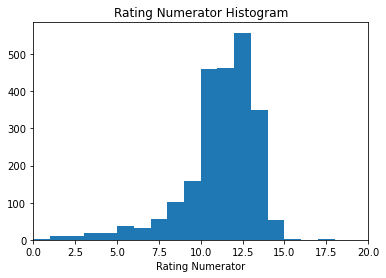

In [65]:
#checking for the range of the rating numerator
bins = np.arange(0, df_archive['rating_numerator'].max()+1, 1)
plt.hist(data=df_archive, x='rating_numerator', bins=bins)
plt.title('Rating Numerator Histogram')
plt.xlabel('Rating Numerator')
plt.xlim(0, 20);

In [66]:
df_archive.rating_denominator.unique()
#Normat denominator should be 10

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [67]:
# Examining the rows data that have a denominator of 10
pd.set_option('display.max_colwidth', None)

df_archive.loc[df_archive.rating_denominator!=10,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [68]:
#Examining for unique dog names and its distribution
df_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [69]:
df_archive.name.value_counts().sort_index(ascending=False)

very            5
unacceptable    1
this            1
the             8
such            1
               ..
Aiden           1
Adele           1
Acro            1
Ace             1
Abby            2
Name: name, Length: 957, dtype: int64

## img_df assessment

In [70]:
#Visual Assesment
img_df.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
916,701545186879471618,https://pbs.twimg.com/media/CbxjnyOWAAAWLUH.jpg,1,Border_collie,0.280893,True,Cardigan,0.112550,True,toy_terrier,0.053317,True
2030,882992080364220416,https://pbs.twimg.com/media/DEEEnIqXYAAiJh_.jpg,1,Eskimo_dog,0.466778,True,Siberian_husky,0.406044,True,dingo,0.073414,False
1111,724046343203856385,https://pbs.twimg.com/media/CgxUTS_XEAAC0pv.jpg,1,boxer,0.826272,True,bull_mastiff,0.158595,True,Great_Dane,0.011859,True


In [73]:
#Programmatic assesment\
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [74]:
#There are 2356 entries in the archive table and there 2075 in the image table-- a discerepancy
# Check if there are any records in df_archive whose corresponding record with same tweet_id is missing in img_df table
len(df_archive[~df_archive.tweet_id.isin(img_df.tweet_id)])

281

In [75]:
#there are 281 missing 

###  Tweet_json Assessment

In [76]:
tweet_json_df.sample(5)

,tweet_id,retweet_count,favorite_count,display_text_range,full_text
1759,678675843183484930,1680,3155,"[0, 140]",Exotic pup here. Tail long af. Throat looks swollen. Might breathe fire. Exceptionally unfluffy 2/10 would still pet https://t.co/a8SqCaSo2r
750,779056095788752897,5247,16500,"[0, 86]",Everybody drop what you're doing and look at this dog. 13/10 must be super h*ckin rare https://t.co/I1bJUzUEW5
362,829374341691346946,10706,38074,"[0, 76]",This is Astrid. She's a guide doggo in training. 13/10 would follow anywhere https://t.co/xo7FZFIAao
1246,711363825979756544,1287,3996,"[0, 52]","""Please, no puparazzi"" 11/10 https://t.co/nJIXSPfedK"
1788,677530072887205888,250,1161,"[0, 136]",Say hello to Axel. He's a Black Chevy Pinot on wheels. 0 to 60 in 5.7 seconds (if downhill). 9/10 I call shotgun https://t.co/DKe9DBnnHE


In [77]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2354 non-null   int64 
 1   retweet_count       2354 non-null   int64 
 2   favorite_count      2354 non-null   int64 
 3   display_text_range  2354 non-null   object
 4   full_text           2354 non-null   object
dtypes: int64(3), object(2)
memory usage: 92.1+ KB


In [78]:
#There are 2356 entries in the archive table and there 2354 in the json tweet  table-- a discerepancy 
# Check if there are any records in df_archive whose corresponding record with same tweet_id is missing in img_df table
len(df_archive[~df_archive.tweet_id.isin(tweet_json_df.tweet_id)])

2

## Quality Issues:
    - Inappropiate datatype for tweet_id across 3 tables-- should be string not int.
    - They are a lot of missing data in some feautures in the df_archive table - e.g "expanded_url" column.
    - Missing values are also represented as "None" in name,doggo,floofer,pupper,puppo tables of df_archive tables.
    - The df_archive table contains Retweets while its only original tweets that are needed
    - Inappropiate datatype for timestamp column in df_archive table-- should be datetime instead
    
    -There are unnecessary html tags in the 'Source" column instead of just source name eg 'Twitter for iPhone' instead of <a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>
    -The rating_numerator of df_archive table has some erroneously large numbers  (e.g. 1176,960,420,182)
    -The rating_denominator column also has other values besides 10(2,150, 170)-- some are due to the text having 2 ratings (like) figures  in it as seen from the programmatic asessment of denominators not 10.
    -DOg names have inappropriate names eg(very,unacceptable,this,the,such), all starting with lower cases--(a validity issue)
    -Many tweet_id(s) --186 tweet data rows from the archive table are missing in img_df (image predictions) table.
    -2 tweet_id(s) from the archive table are missing in tweet json table.



## Tidiness issues:
    - Dogs kind 4 stages in 4 diffedifferent  columns(doggo,floofer,pupper and puppo) and they should be in one column.
    - p1, p2, and p3 in the img_df table are not properly formatted.
    - All three tables need to be merged  into 1.

# Data Cleaning

In [79]:
#making a copy of all dataset before commencing cleaning
archiveC_df=df_archive.copy()
imgC_df=img_df.copy()
tweet_json_df_C=tweet_json_df.copy()

### DEFINE:
    .Change data type of tweet_id in archiveC_df,imgC_df,tweet_dfC from int to str using .astype() function
    .Change datatype of timestamp to date time
    

#### Code

In [80]:
archiveC_df.tweet_id = archiveC_df.tweet_id.astype(str)
imgC_df.tweet_id = imgC_df.tweet_id.astype(str)
tweet_json_df_C.tweet_id = tweet_json_df_C.tweet_id.astype(str)

In [81]:
archiveC_df.timestamp=archiveC_df.timestamp.astype('datetime64') 

#### Test:

In [82]:
archiveC_df.dtypes

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

In [83]:
imgC_df.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [84]:
tweet_json_df_C.dtypes

tweet_id              object
retweet_count          int64
favorite_count         int64
display_text_range    object
full_text             object
dtype: object

In [85]:
tweet_json_df_C.display_text_range

0        [0, 85]
1       [0, 138]
2       [0, 121]
3        [0, 79]
4       [0, 138]
          ...   
2349    [0, 120]
2350    [0, 137]
2351    [0, 130]
2352    [0, 139]
2353    [0, 131]
Name: display_text_range, Length: 2354, dtype: object

#### Define:
    Removing rows in the archiveC_df that are not original tweets;i.e Removing Retweets

#### Code

In [86]:
archiveC_df = archiveC_df[~(archiveC_df.retweeted_status_id.notnull())]

#### Test:

In [87]:
len(archiveC_df[archiveC_df.retweeted_status_id.notnull()])

0

In [88]:
archiveC_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2175 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2175 non-null   datetime64[ns]
 4   source                      2175 non-null   object        
 5   text                        2175 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2117 non-null   object        
 10  rating_numerator            2175 non-null   int64         
 11  rating_denominator          2175 non-null   int64       

#### Define:
    Drop the rows :retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp

#### Code:
    

In [89]:
archiveC_df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)



#### Test:

In [90]:
archiveC_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2175 non-null   object        
 1   in_reply_to_status_id  78 non-null     float64       
 2   in_reply_to_user_id    78 non-null     float64       
 3   timestamp              2175 non-null   datetime64[ns]
 4   source                 2175 non-null   object        
 5   text                   2175 non-null   object        
 6   expanded_urls          2117 non-null   object        
 7   rating_numerator       2175 non-null   int64         
 8   rating_denominator     2175 non-null   int64         
 9   name                   2175 non-null   object        
 10  doggo                  2175 non-null   object        
 11  floofer                2175 non-null   object        
 12  pupper                 2175 non-null   object        
 13  pup

#### Define:
    Keeping only rows in archiveC_df  whose tweetid is presnet in img_df

#### Code:
    

In [91]:
archiveC_df = archiveC_df[archiveC_df.tweet_id.isin(imgC_df.tweet_id)]

#### Test:

In [92]:
len(archiveC_df[~archiveC_df.tweet_id.isin(imgC_df.tweet_id)])

0

In [93]:
archiveC_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1994 non-null   object        
 1   in_reply_to_status_id  23 non-null     float64       
 2   in_reply_to_user_id    23 non-null     float64       
 3   timestamp              1994 non-null   datetime64[ns]
 4   source                 1994 non-null   object        
 5   text                   1994 non-null   object        
 6   expanded_urls          1994 non-null   object        
 7   rating_numerator       1994 non-null   int64         
 8   rating_denominator     1994 non-null   int64         
 9   name                   1994 non-null   object        
 10  doggo                  1994 non-null   object        
 11  floofer                1994 non-null   object        
 12  pupper                 1994 non-null   object        
 13  pup

#### Define:
    drop in_reply_to_status_id,in_reply_to_user_id as they have little values and little contribution to the dataset and proceeding analysis

In [94]:
archiveC_df.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id'], inplace = True)

#### test:

In [95]:
archiveC_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [96]:
archiveC_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1994 non-null   object        
 1   timestamp           1994 non-null   datetime64[ns]
 2   source              1994 non-null   object        
 3   text                1994 non-null   object        
 4   expanded_urls       1994 non-null   object        
 5   rating_numerator    1994 non-null   int64         
 6   rating_denominator  1994 non-null   int64         
 7   name                1994 non-null   object        
 8   doggo               1994 non-null   object        
 9   floofer             1994 non-null   object        
 10  pupper              1994 non-null   object        
 11  puppo               1994 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 202.5+ KB


### Define:
    Remove HTML tags in the source column and only leave the name of the source

#### Code

In [97]:
archiveC_df.source = archiveC_df.source.str.extract('^<a.+>(.+)</a>$')

#### Test:

In [98]:
archiveC_df.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

#### Define:
    Replace "-" with space (" ") for p1, p2, and p3 in the imgC_df table for proper formatting

#### Code:

In [99]:
imgC_df.p1 = imgC_df.p1.str.replace("_", " ")
imgC_df.p2 = imgC_df.p2.str.replace("_", " ")
imgC_df.p3 = imgC_df.p3.str.replace("_", " ")

#### Test:

In [100]:
imgC_df.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border collie,0.199287,True,ice lolly,0.193548,False
46,666804364988780544,https://pbs.twimg.com/media/CUD3A7YWoAA82N0.jpg,1,English setter,0.328792,True,Brittany spaniel,0.283545,True,Ibizan hound,0.057461,True


# Define:
    -Replace 5 ratings manually from the text with correct rating(ratings with erroneous double ratings in test ).
    - Check the rating_numerator and rating_denominator for oberservations of wrong values and adjust appropiately.
    - Drop columns with denominator ratings other than 10
    - Drop oberservations with extreme numerator ratings.

#### Code

In [101]:
archiveC_df.loc[archiveC_df.tweet_id=='740373189193256964',['rating_numerator','rating_denominator']]=[14,10]
archiveC_df.loc[archiveC_df.tweet_id=='722974582966214656',['rating_numerator','rating_denominator']]=[13,10]
archiveC_df.loc[archiveC_df.tweet_id=='716439118184652801',['rating_numerator','rating_denominator']]=[11,10]
archiveC_df.loc[archiveC_df.tweet_id=='682962037429899265',['rating_numerator','rating_denominator']]=[10,10]
archiveC_df.loc[archiveC_df.tweet_id=='666287406224695296',['rating_numerator','rating_denominator']]=[9,10]

#### Test

In [102]:
archiveC_df[archiveC_df.tweet_id=='740373189193256964']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14,10,None,None,None,None,None


In [103]:
archiveC_df[archiveC_df.tweet_id=='722974582966214656']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1165,722974582966214656,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13,10,None,None,None,None,None


In [104]:
archiveC_df[archiveC_df.tweet_id=='716439118184652801']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11,10,Bluebert,None,None,None,None


In [105]:
archiveC_df[archiveC_df.tweet_id=='682962037429899265']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1662,682962037429899265,2016-01-01 16:30:13,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,https://twitter.com/dog_rates/status/682962037429899265/photo/1,10,10,Darrel,None,None,None,None


In [106]:
archiveC_df[archiveC_df.tweet_id=='666287406224695296']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,2015-11-16 16:11:11,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9,10,an,None,None,None,None


#### Define:
    - Drop denominator ratings that are not 10

#### Code

In [107]:
#remove denominator that are not 10
archiveC_df = archiveC_df[archiveC_df.rating_denominator == 10]

#### Test:

In [108]:
archiveC_df.rating_denominator.unique()

array([10], dtype=int64)

#### Define:
    Drop unnecessarirly high values for rating_numerator

In [109]:
archiveC_df = archiveC_df[archiveC_df.rating_numerator<15]

#### Test:

In [110]:
archiveC_df.rating_numerator.value_counts()

12    450
10    420
11    397
13    262
9     151
8      95
7      51
14     36
5      33
6      32
3      19
4      15
2       9
1       4
0       2
Name: rating_numerator, dtype: int64

#### Define:
    -Replace inappropriate names(starting with lowercases ) with 'None'

#### Code:

In [111]:
archiveC_df['name'][archiveC_df['name'].str.match('[a-z]+')] = 'None'

#### Test:

In [112]:
archiveC_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

In [113]:
archiveC_df.name.value_counts()

None          630
Charlie        11
Lucy           10
Cooper         10
Oliver         10
             ... 
Bookstore       1
Atticus         1
Jersey          1
Shiloh          1
Christoper      1
Name: name, Length: 913, dtype: int64

In [114]:
archiveC_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1976 non-null   object        
 1   timestamp           1976 non-null   datetime64[ns]
 2   source              1976 non-null   object        
 3   text                1976 non-null   object        
 4   expanded_urls       1976 non-null   object        
 5   rating_numerator    1976 non-null   int64         
 6   rating_denominator  1976 non-null   int64         
 7   name                1976 non-null   object        
 8   doggo               1976 non-null   object        
 9   floofer             1976 non-null   object        
 10  pupper              1976 non-null   object        
 11  puppo               1976 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 200.7+ KB


#### Define:
    - Merge doggo, floofer, pupper and puppo columns in archiveC_df table into one column named "dog_stage"
    - Drop the doggo, floofer, pupper and puppo columns.

In [115]:

archiveC_df['dog_stage'] = archiveC_df[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [116]:
# drop the doggo, floofer, pupper and puppo columns
archiveC_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test:
    

In [117]:
archiveC_df.dog_stage.value_counts()

None       1671
pupper      211
doggo        63
puppo        23
floofer       8
Name: dog_stage, dtype: int64

In [118]:
archiveC_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

#### Define:

   - Left join tweet_json_df_C to archiveC_df table on tweet_id to put all tweet data in the same dataframe.
   - Because archiveC_df does not have any retweets, this should also remove any favorite_count with value 0.
   - Left join imgC_df to archiveC_df table on tweet_id to put all tweet data in the same dataframe.


In [119]:

#Code
archiveC_df = archiveC_df.merge(tweet_json_df_C, how='left', on='tweet_id')
archiveC_df = archiveC_df.merge(imgC_df, how='left', on='tweet_id')



#### Test:

In [120]:
archiveC_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1976 non-null   object        
 1   timestamp           1976 non-null   datetime64[ns]
 2   source              1976 non-null   object        
 3   text                1976 non-null   object        
 4   expanded_urls       1976 non-null   object        
 5   rating_numerator    1976 non-null   int64         
 6   rating_denominator  1976 non-null   int64         
 7   name                1976 non-null   object        
 8   dog_stage           1976 non-null   object        
 9   retweet_count       1976 non-null   int64         
 10  favorite_count      1976 non-null   int64         
 11  display_text_range  1976 non-null   object        
 12  full_text           1976 non-null   object        
 13  jpg_url             1976 non-null   object      

# Storing Data

In [121]:
archiveC_df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

# Analysing Data

In [122]:
#Reading Data into dataFrame
DogRating_df = pd.read_csv("twitter_archive_master.csv")

In [123]:
DogRating_df.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1395,678991772295516161,2015-12-21 17:33:48,Twitter for iPhone,If your Monday isn't going so well just take a look at this. Both 12/10 https://t.co/GJT6SILPGU,https://twitter.com/dog_rates/status/678991772295516161/photo/1,12,10,None,None,1333,...,1,Eskimo dog,0.330216,True,Siberian husky,0.187003,True,Chihuahua,0.101420,True
917,716791146589110272,2016-04-04 00:55:01,Twitter for iPhone,Meet Jennifur. She's supposed to be navigating. Not even buckled up. Insubordinate &amp; churlish. 11/10 would still pet https://t.co/h0trcJohYO,https://twitter.com/dog_rates/status/716791146589110272/photo/1,11,10,Jennifur,None,1474,...,1,Pomeranian,0.468751,True,seat belt,0.154652,False,golden retriever,0.125017,True
64,878057613040115712,2017-06-23 01:10:23,Twitter for iPhone,This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://t.co/cwtWnHMVpe,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,7181,...,1,French bulldog,0.839097,True,Boston bull,0.078799,True,toy terrier,0.015243,True
381,811744202451197953,2016-12-22 01:24:33,Twitter for iPhone,This is Halo. She likes watermelon. 13/10 https://t.co/TZkiQZqwA6,https://twitter.com/dog_rates/status/811744202451197953/photo/1,13,10,Halo,None,1884,...,1,Pekinese,0.386082,True,Labrador retriever,0.202862,True,golden retriever,0.170487,True
953,711732680602345472,2016-03-21 01:54:29,Twitter for iPhone,I want to hear the joke this dog was just told. 10/10 https://t.co/1KiuZqqOD4,"https://twitter.com/dog_rates/status/711732680602345472/photo/1,https://twitter.com/dog_rates/status/711732680602345472/photo/1,https://twitter.com/dog_rates/status/711732680602345472/photo/1",10,10,None,None,4653,...,3,dingo,0.366875,False,Ibizan hound,0.334929,True,Eskimo dog,0.073876,True


In [124]:
DogRating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1976 non-null   int64  
 1   timestamp           1976 non-null   object 
 2   source              1976 non-null   object 
 3   text                1976 non-null   object 
 4   expanded_urls       1976 non-null   object 
 5   rating_numerator    1976 non-null   int64  
 6   rating_denominator  1976 non-null   int64  
 7   name                1976 non-null   object 
 8   dog_stage           1976 non-null   object 
 9   retweet_count       1976 non-null   int64  
 10  favorite_count      1976 non-null   int64  
 11  display_text_range  1976 non-null   object 
 12  full_text           1976 non-null   object 
 13  jpg_url             1976 non-null   object 
 14  img_num             1976 non-null   int64  
 15  p1                  1976 non-null   object 
 16  p1_con

In [125]:
DogRating_df.timestamp=DogRating_df.timestamp.astype('datetime64') 

#### Analysing twitter post trend overtime

In [126]:
# separating year and month for further analysis
DogRating_df['year'] = DogRating_df['timestamp'].dt.year
DogRating_df['month'] = DogRating_df['timestamp'].dt.month

In [127]:
# Number of new tweets overtime
DogRating_df.groupby(['year','month'])['tweet_id'].count().to_frame()

tweet_id
year month          
2015 11          295
     12          364
2016 1           167
     2           109
     3           117
     4            54
     5            56
     6            81
     7            86
     8            59
     9            62
     10           64
     11           53
     12           53
2017 1            65
     2            64
     3            48
     4            41
     5            43
     6            44
     7            49
     8             2

In [128]:
# Engagement trend overtime
DogRating_df.groupby(['year','month'])['favorite_count'].max().to_frame()

favorite_count
year month                
2015 11              49720
     12              67100
2016 1               35052
     2               28996
     3               35865
     4               20697
     5               44619
     6              131075
     7               28519
     8               55016
     9               33345
     10              33689
     11              55683
     12             107015
2017 1              132810
     2               73397
     3               48410
     4               47844
     5              106827
     6              107956
     7               69871
     8               39467

### Common Dog Names

In [129]:
DogRating_df.name.nunique()

913

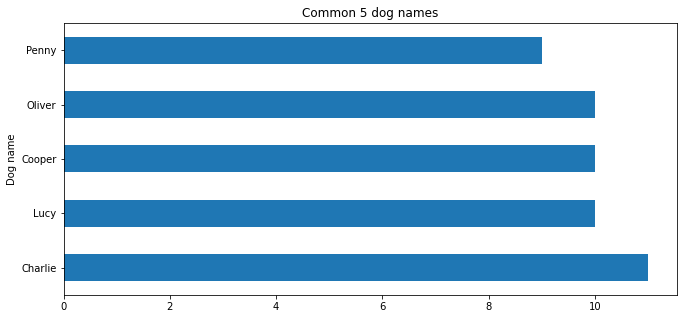

In [130]:
DogRating_df.name.value_counts()[1:6].plot(kind='barh', xlabel='Dog name',ylabel='count',title="Common 5 dog names",figsize=(11,5));

#### It can be observed the common DOg Pet names from analysis of the Tweets are Penny,Oliver,Cooper,Lucy,Charlie

### MOST USED TWITTER SOURCE

In [131]:
DogRating_df['source'].value_counts().to_frame()

,source
Twitter for iPhone,1938
Twitter Web Client,28
TweetDeck,10


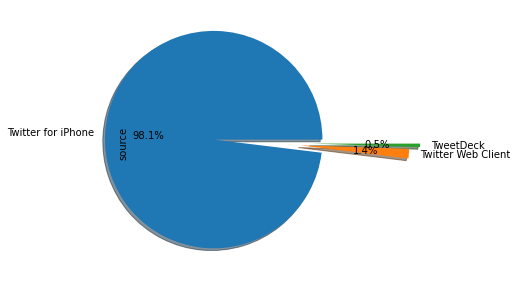

In [132]:
DogRating_df['source'].value_counts().plot(kind='pie',explode=(0.5,0.3,0.4),autopct='%1.1f%%',shadow=True,figsize=(11,5));

#### Twitter for iPhone is the most used twitter source

In [133]:
x=DogRating_df['dog_stage'].value_counts()


### Analysing Dog Stages

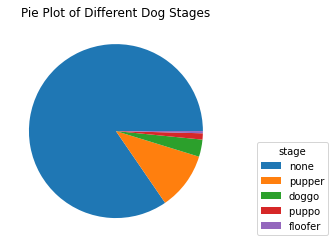

In [134]:
plt.pie(x);

plt.legend(['none','pupper','doggo','puppo ','floofer'],title="stage",
          loc="lower right",bbox_to_anchor=(1, 0, 0.5, 0.8));

plt.title('Pie Plot of Different Dog Stages');

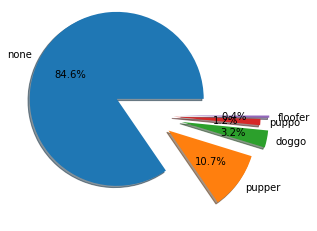

<Figure size 792x648 with 0 Axes>

In [135]:
plt.pie(x,labels=['none','pupper','doggo','puppo','floofer'],shadow=True,explode=(.4,.3,.4,.3,.4),autopct='%1.1f%%',)
plt.figure(figsize=(11, 9))

plt.show();

### From both images above, it can be seen that besides none Puupper has the highest percentage of Dog Stages and Floofer has the lowest

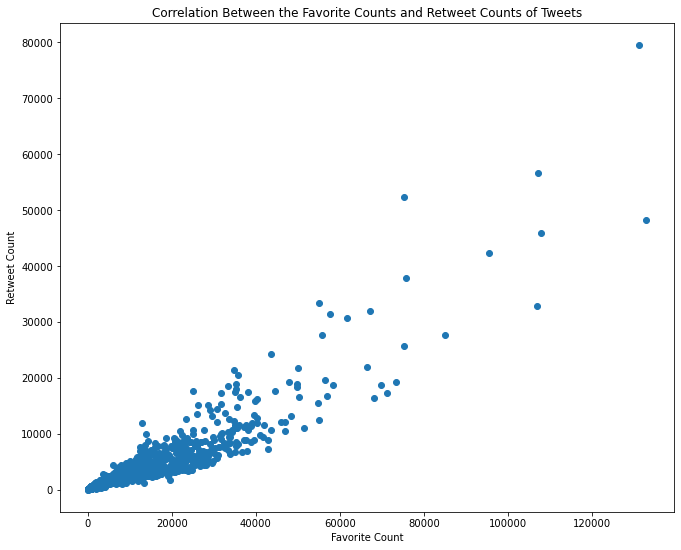

In [136]:
plt.figure(figsize=(11, 9))
ax = plt.axes()
ax.scatter(DogRating_df.favorite_count, DogRating_df.retweet_count)

ax.set_xlabel('Favorite Count')
ax.set_ylabel('Retweet Count')
ax.set_title('Correlation Between the Favorite Counts and Retweet Counts of Tweets')

plt.show()

#### It is noted that There is positive correlation between retweets and favorite counts

### Rating Distribution

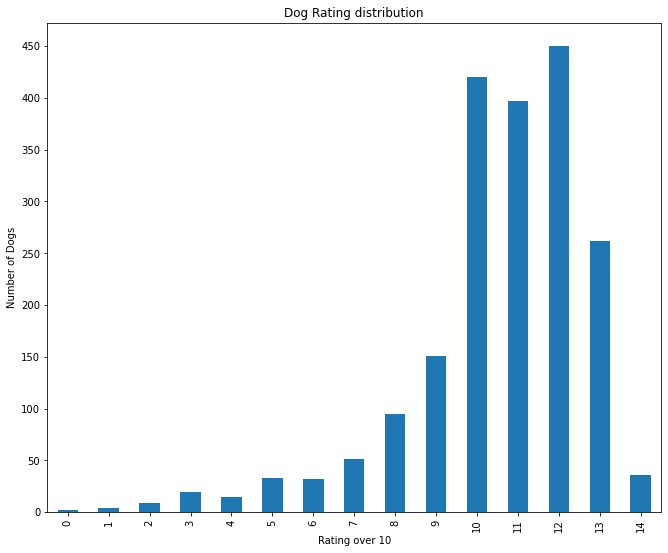

In [137]:
plt.figure(figsize=(11, 9))
ax = DogRating_df.rating_numerator.value_counts().sort_index().plot(kind='bar', title = 'Dog Rating distribution')
ax.set_xlabel("Rating over 10")
ax.set_ylabel("Number of Dogs")
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450])
plt.savefig('rating_dist')